In [1]:
import numpy as np
import pandas as pd

# 读取数据
df = pd.read_csv('E:\\machineLearning\\kaggle\\dataset\\iris.data')
df.columns = ['sepal_len', 'speal_wid', 'petal_len', 'petal_wid', 'class']
df.head()

,sepal_len,speal_wid,petal_len,petal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


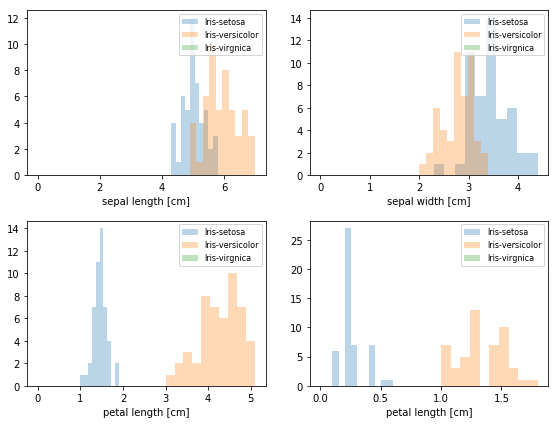

In [3]:
# 将数据分为特征和标签
from matplotlib import pyplot as plt

X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
label_dict = {1: 'Iris-Setosa', 2: 'Iris-Versicolor', 3: 'Iris-Virgnica'}
feature_dict = {0: 'sepal length [cm]', 1: 'sepal width [cm]', 2: 'petal length [cm]', 3: 'petal length [cm]'}
plt.figure(figsize=(8, 6))
for cnt in range(4):
    plt.subplot(2, 2, cnt + 1)
    for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virgnica'):
        plt.hist(X[y == lab, cnt], label=lab, bins=10, alpha=0.3,)
    plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.tight_layout()
plt.show()

In [4]:
# 3. 数据标准化处理
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [5]:
# 4. 计算协方差矩阵
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0] - 1)
print('协方差矩阵 \n%s' %cov_mat)

协方差矩阵 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [6]:
# 5. 求特征值和特征向量
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('特征值 \n%s' %eig_vecs)
print('\n特征向量 \n%s' %eig_vals)

特征值 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

特征向量 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [7]:
# 6. 特征值大小排序
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
print('特征值排序结果:\n')
for i in eig_pairs:
    print(i[0])

特征值排序结果:

2.9244283691111135
0.9321523302535066
0.1494637348981336
0.02098259276427038


In [8]:
# 7. 计算累加贡献值
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp # 发现使用前两个特征对应累计贡献度已到95%，故选择降到二维

[72.6200333269203, 23.14740685864414, 3.7115155645845284, 0.5210442498510098]


array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

In [9]:
# 8. 完成PCA降维
matrix_w = np.hstack((eig_pairs[0][1].reshape(4, 1), eig_pairs[1][1].reshape(4, 1)))
Y = X_std.dot(matrix_w)
Y.shape

(149, 2)